In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Calculates the polynomial
def y(time,w):
    new_y = 0
    for i in range(len(w)):
        new_y += w[i]*time**i
    return new_y

# Calculates the MSE (Mean Square Error)
def mse(time,signal,w):
     return (signal-time@w).T @ (signal-time@w) / len(time)

# Calculates the coefficients according to the training data
def calc_w(time,signal,lamda=0):
    mat = np.linalg.inv(time.T @ time + lamda*np.eye(time.shape[1])) @ time.T @ signal
    return mat

# Creates a matrix for the training data with a column of ones and a column of x raised to the power of d
def create_matrix(t,f):
    new_x = np.ones((len(t), 2))
    new_x[:,1] = np.cos(2*np.pi*f*t)
    return new_x

In [85]:
# Loading the data
time = pd.read_csv("signal_part_a.csv")['time'].values
signal = pd.read_csv("signal_part_a.csv")['Noisy signal'].values
symbols = pd.read_csv("Symbols2Freq.csv")
symbols_dict = dict(zip(symbols['frequency'], symbols['symbol']))

# Splitting the signal into 100 parts
split_time = np.array_split(time, np.ceil(len(time)/100))
split_signal = np.array_split(signal, np.ceil(len(signal)/100))

Message:  WELL DONE! YOU SUCCESFULLY COMPLETED PART A OF THE MACHINE LEARNING TASK IN THE COURSE 'INTRODUCTION TO DIGITAL SIGNAL AND INFORMATION PROCESSING'
Frequencies:  [23, 5, 12, 12, 37, 4, 15, 14, 5, 40, 37, 25, 15, 21, 37, 19, 21, 3, 3, 5, 19, 6, 21, 12, 12, 25, 37, 3, 15, 13, 16, 12, 5, 20, 5, 4, 37, 16, 1, 18, 20, 37, 1, 37, 15, 6, 37, 20, 8, 5, 37, 13, 1, 3, 8, 9, 14, 5, 37, 12, 5, 1, 18, 14, 9, 14, 7, 37, 20, 1, 19, 11, 37, 9, 14, 37, 20, 8, 5, 37, 3, 15, 21, 18, 19, 5, 37, 48, 9, 14, 20, 18, 15, 4, 21, 3, 20, 9, 15, 14, 37, 20, 15, 37, 4, 9, 7, 9, 20, 1, 12, 37, 19, 9, 7, 14, 1, 12, 37, 1, 14, 4, 37, 9, 14, 6, 15, 18, 13, 1, 20, 9, 15, 14, 37, 16, 18, 15, 3, 5, 19, 19, 9, 14, 7, 48]
Length of message:  146

In this plot, we can see each signal, it's decoded char, the MSE, and the frequency that allowed us to identify this signal.


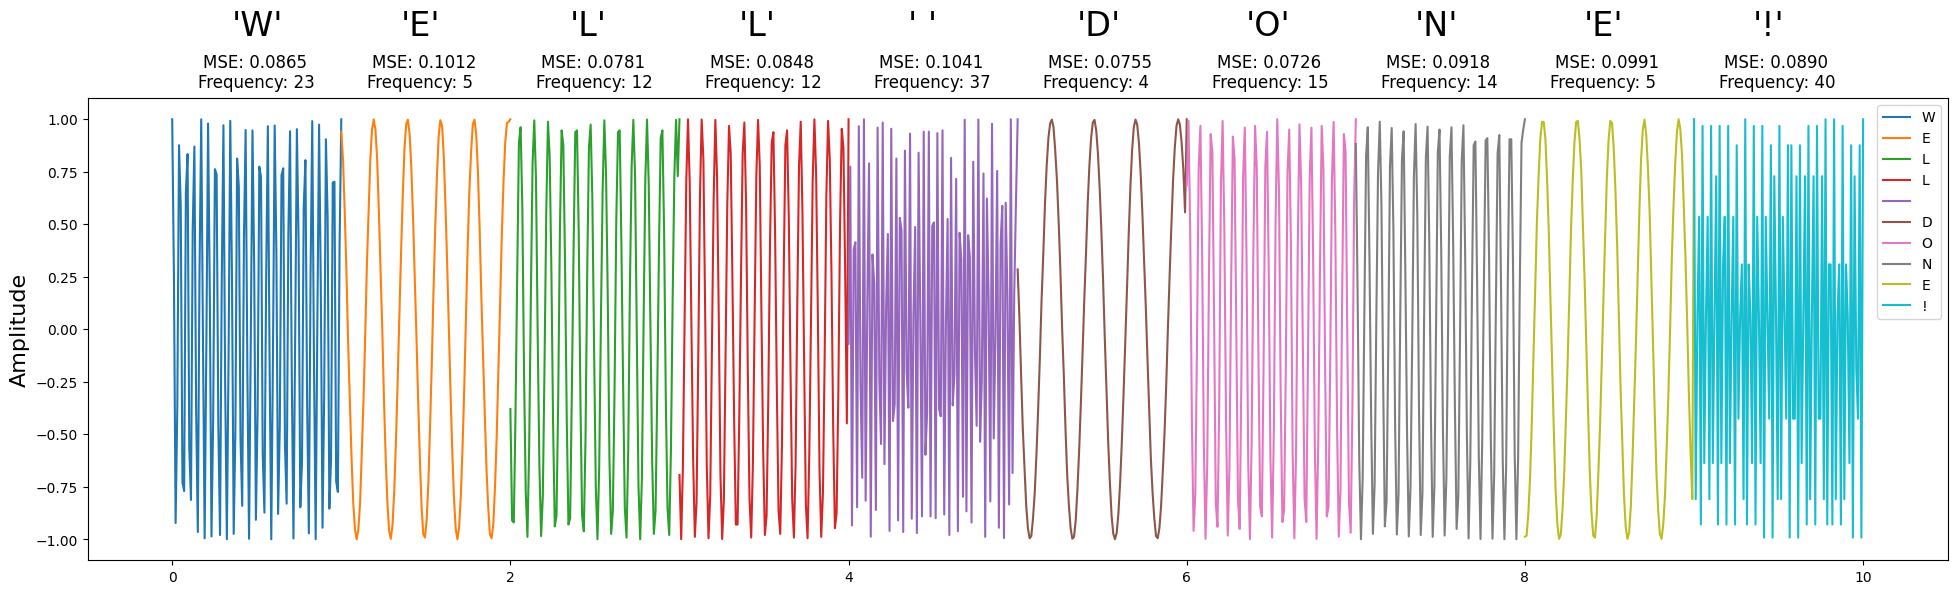

In this plot we can see how the MSE changes for each frequency, and the lowest MSE shows us what the most fitting frequency is for each char.


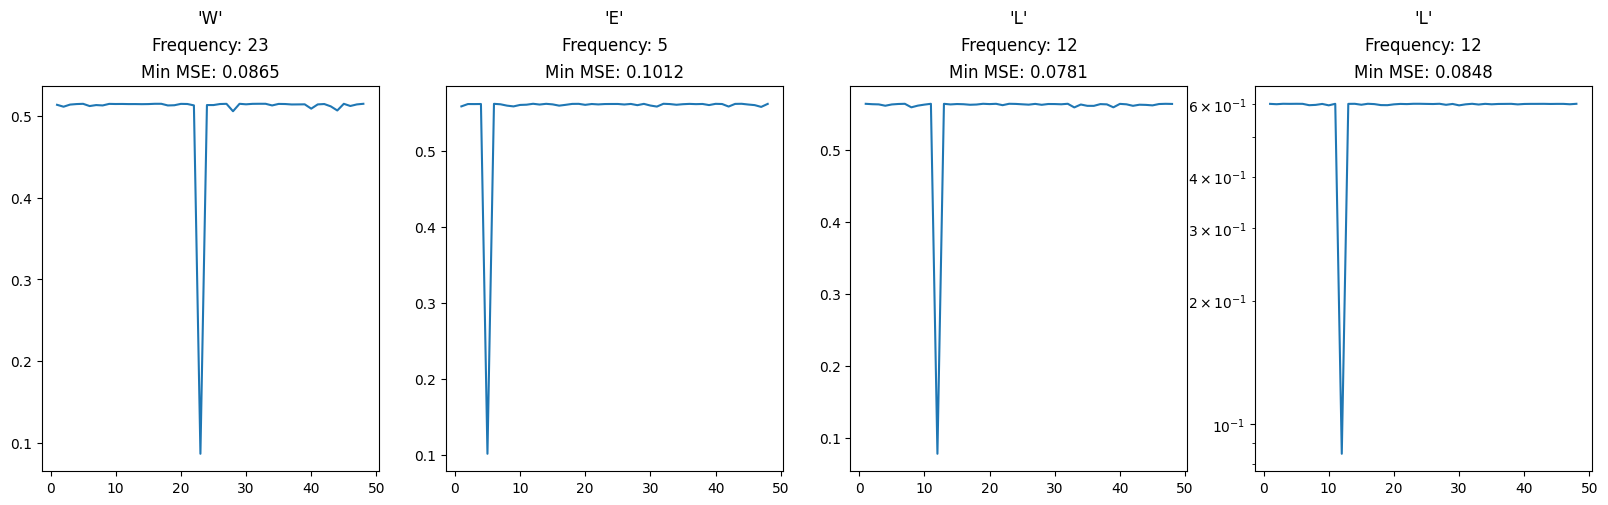

In [ ]:
# In this part, we want to identify which frequency corresponds to each char.
# We have a Symbols2Freq.csv file which tells us which frequency corresponds to each char.
# We can test the frequencies 1-48 to see which one will give us the lowest MSE.

# Initializing variables
message = ''
freqs = []
# For the decision plot
example_train_err = []

# Decoding the message using the given symbols
for i in range(len(split_time)):

    train_err = []
    w_by_order = []
    
    # Trying out frequencies 1-48 and calculating the error for each of them
    for freq in range(1,49):
        new_train_matrix = create_matrix(split_time[i],freq)
        w = calc_w(new_train_matrix,split_signal[i])
        w_by_order.append(w)
        train_err.append(mse(new_train_matrix,split_signal[i],w))
        # For the decision plot
        if freq == 1:
            example_train_err.append([])
        example_train_err[i].append(mse(new_train_matrix,split_signal[i],w))

    # Saving the frequency that fits the char the most
    lowest_err = np.inf
    best_freq = 0
    for i in train_err:
        if i < lowest_err:
            lowest_err = i
            best_freq = train_err.index(i) + 1

    freqs.append(best_freq)

    # Decoding the message
    message += str(symbols_dict[best_freq])

print('Message: ', message)
print('Frequencies: ', freqs)
print('Length of message: ',len(message))

# Prints for the data

# for i in range(len(train_err)):
#     print(f'{i} Order Train Error: {train_err[i]}')

# for i in range(len(w_by_order)):
#     print(f'{i} Order Coefficients: {w_by_order[i]}')

# Taking the first 2 words of the message
plot_freqz = np.array(freqs)[0:10]
plot_signal = []
for i in range(len(plot_freqz)):
    my_signal = np.cos(2*np.pi*plot_freqz[i]*split_time[i])
    plot_signal.append(my_signal)

# Plotting the first 2 words of the signal, and the decoded message

print(); print("In this plot, we can see each signal, it's decoded char, the MSE, and the frequency that allowed us to identify this signal.")

plt.figure(figsize=(24, 6))
for i in range(len(plot_signal)):
    t = np.linspace(0+i, 1+i, 100)
    plt.plot(t,plot_signal[i], label=symbols_dict[freqs[i]])
    plt.text(0.35 + i, 1.4, f"'{symbols_dict[freqs[i]]}'", fontsize=24, color='black')
    plt.text(0.18 + i, 1.25, "MSE: " + "%.4f" % min(example_train_err[i]), fontsize=12, color='black')
    plt.text(0.15 + i, 1.15, f"Frequency: {freqs[i]}", fontsize=12, color='black')
    plt.ylabel('Amplitude', fontsize=16)
    plt.legend()

plt.show()

# Decision plot

print("In this plot we can see how the MSE changes for each frequency, and the lowest MSE shows us what the most fitting frequency is for each char.")

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
x = range(1,49)

for i,ax in enumerate(axes):
    ax.plot(x,example_train_err[i], label="Train Error")
    ax.text(0.5, 1.20, f"'{symbols_dict[freqs[i]]}'", transform=ax.transAxes, ha="center", va="top", fontsize=12, color='black')
    ax.text(0.5, 1.13, f"Frequency: {freqs[i]}", transform=ax.transAxes, ha="center", va="top", fontsize=12, color='black')
    ax.text(0.5, 1.06, "Min MSE: " + "%.4f" % min(example_train_err[i]), transform=ax.transAxes, ha="center", va="top", fontsize=12, color='black')

plt.yscale('log')
plt.show()